In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
df = pd.read_csv(r"C:\Users\Saikiran\Desktop\2_ad\AD2\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
list(df.columns)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.shape

(284807, 31)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5]),
 [Text(0.5, 0, 'Time'),
  Text(2.5, 0, 'V2'),
  Text(4.5, 0, 'V4'),
  Text(6.5, 0, 'V6'),
  Text(8.5, 0, 'V8'),
  Text(10.5, 0, 'V10'),
  Text(12.5, 0, 'V12'),
  Text(14.5, 0, 'V14'),
  Text(16.5, 0, 'V16'),
  Text(18.5, 0, 'V18'),
  Text(20.5, 0, 'V20'),
  Text(22.5, 0, 'V22'),
  Text(24.5, 0, 'V24'),
  Text(26.5, 0, 'V26'),
  Text(28.5, 0, 'V28'),
  Text(30.5, 0, 'Class')])

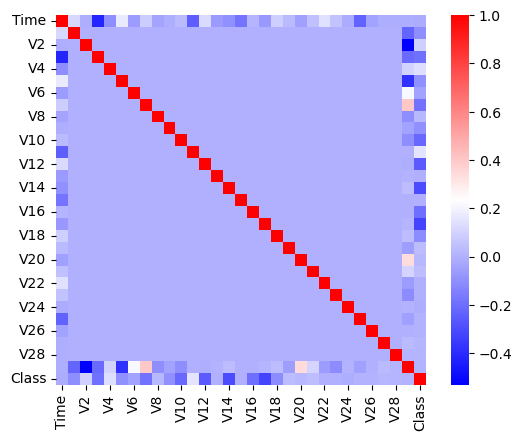

In [12]:
correlations = df.corr()
sns.heatmap(data = correlations,square = True, cmap = "bwr")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [13]:
df["Amount"] = (df["Amount"] - df["Amount"].mean()) / df["Amount"].std()


In [14]:
train_size = int(len(df) * 0.7)
train_df = df[:train_size]
test_df = df[train_size:]
X_train = train_df.drop("Class", axis=1)
y_train = train_df["Class"]
X_test = test_df.drop("Class", axis=1)
y_test = test_df["Class"]

In [15]:
model = keras.Sequential([
    keras.layers.Dense(16, input_dim=X_train.shape[1], activation="relu"),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [16]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [17]:
model.fit(X_train, y_train, epochs=5, batch_size=15)


Epoch 1/5
13291/13291 [==============================] - 52s 4ms/step - loss: 1.8183 - accuracy: 0.9967
Epoch 2/5
13291/13291 [==============================] - 50s 4ms/step - loss: 0.0167 - accuracy: 0.9981
Epoch 3/5
13291/13291 [==============================] - 51s 4ms/step - loss: 0.0266 - accuracy: 0.9979
Epoch 4/5
13291/13291 [==============================] - 51s 4ms/step - loss: 0.0164 - accuracy: 0.9980
Epoch 5/5
13291/13291 [==============================] - 50s 4ms/step - loss: 0.0212 - accuracy: 0.9980


In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

2671/2671 [==============================] - 7s 3ms/step - loss: 0.0100 - accuracy: 0.9987
Test accuracy: 0.9987360239028931


In [34]:
def adversarial_train(model, x, y, eps):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y_pred = model(x)
        y_onehot = tf.one_hot(y, depth=y_pred.shape[-1])
        loss = tf.keras.losses.binary_crossentropy(y_onehot, y_pred)
        loss = tf.reduce_mean(loss)
    grad = tape.gradient(loss, x)
    x_adv = x + eps * tf.sign(grad)
    x_adv = tf.clip_by_value(x_adv, 0, 1)
    y_adv = tf.ones_like(y)
    X_combined = tf.concat([x, x_adv], axis=0)
    y_combined = tf.concat([y, y_adv], axis=0)
    perturbation = x_adv - x
    return X_combined, y_combined, x_adv, perturbation

In [35]:
adv_model = keras.Sequential([
    keras.layers.Dense(16, input_dim=X_train.shape[1], activation="relu"),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [36]:
adv_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [37]:
for i in range(10):
    X_combined, y_combined, x_adv, perturbation = adversarial_train(adv_model, X_train_tf, y_train_tf, eps=0.1)
    adv_model.fit(X_combined, y_combined, epochs=1, batch_size=15)
    print("Adversarial example", i+1, ":\n", x_adv.numpy())


26582/26582 [==============================] - 95s 3ms/step - loss: 0.1932 - accuracy: 0.9983
Adversarial example 1 :
 [[0.         0.         0.         ... 0.03355838 0.07894695 0.34496383]
 [0.         1.         0.36615071 ... 0.         0.         0.        ]
 [0.9        0.         0.         ... 0.04464721 0.         1.        ]
 ...
 [1.         0.         0.         ... 0.         0.20024377 0.        ]
 [1.         0.         0.         ... 0.         0.29635614 1.        ]
 [1.         0.         1.         ... 0.         0.         0.        ]]
26582/26582 [==============================] - 66s 2ms/step - loss: 0.0126 - accuracy: 0.9990
Adversarial example 2 :
 [[0.1        0.         0.         ... 0.03355838 0.         0.14496383]
 [0.1        1.         0.16615071 ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         1.        ]
 ...
 [1.         0.         0.05702875 ... 0.0723008  0.10024377 0.        ]
 [1.         0.      

In [22]:
X_train_tf = tf.convert_to_tensor(X_train)
y_train_tf = tf.convert_to_tensor(y_train)

In [23]:
for i in range(10):
    X_combined, y_combined = adversarial_train(adv_model, X_train_tf, y_train_tf, eps=0.1)
    adv_model.fit(X_combined, y_combined, epochs=1, batch_size=15)

26582/26582 [==============================] - 95s 4ms/step - loss: 0.0119 - accuracy: 0.9990


In [24]:
test_loss, test_acc = adv_model.evaluate(X_test, y_test)
print("Adversarial test accuracy:", test_acc)

2671/2671 [==============================] - 7s 3ms/step - loss: 0.0097 - accuracy: 0.9987
Adversarial test accuracy: 0.9987360239028931


In [25]:
from sklearn.metrics import classification_report
y_pred = adv_model.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred))

2671/2671 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.00      0.00      0.00       108

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\Saikiran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saikiran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saikiran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
cm = confusion_matrix(y_test, y_pred)

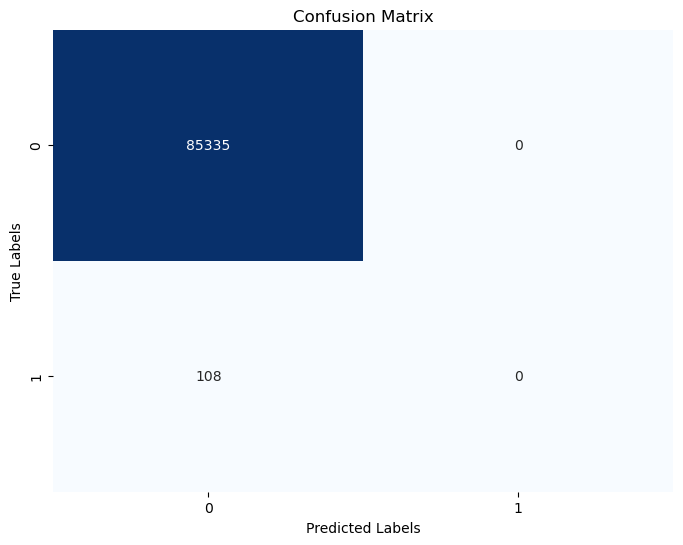

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [38]:
#This code randomly selects a data point from the dataset, extracts the features, and makes a prediction using the trained model. It then compares the prediction to the actual label and prints the data point along with the classification.
print("\nRandom Data Point Fraud Detection:")
random_index = np.random.randint(0, len(df))
random_data = df.iloc[random_index, :-1].values.reshape(1, -1)
random_label = df.iloc[random_index, -1]
random_pred = model.predict(random_data)

if random_pred > 0.5:
    random_pred = 1
    prediction = "fraudulent"
else:
    random_pred = 0
    prediction = "legitimate"

print("Randomly picked data point:")
print(df.iloc[random_index])
print("Prediction:", prediction)
print("Actual Label:", random_label)



Random Data Point Fraud Detection:
1/1 [==============================] - 0s 65ms/step
Randomly picked data point:
Time      43898.000000
V1           -0.722523
V2            0.608715
V3            2.083034
V4            1.135068
V5            0.437541
V6           -0.558226
V7            0.840591
V8           -0.443556
V9           -0.302496
V10           0.469771
V11           0.550799
V12           0.150074
V13           0.329218
V14          -0.234464
V15           1.653917
V16          -0.996330
V17           0.175095
V18          -0.522901
V19           0.133451
V20           0.374862
V21           0.057552
V22           0.617626
V23          -0.241337
V24           0.639175
V25           0.434682
V26          -0.168898
V27          -0.207384
V28          -0.316860
Amount       -0.242762
Class         0.000000
Name: 49073, dtype: float64
Prediction: legitimate
Actual Label: 0


In [39]:
#In this code, the user is prompted to enter the index of the data point (row) they want to check. The corresponding data point is then extracted from the dataset, and the trained model makes a prediction on it. The code compares the prediction to the actual label and prints the data point along with the classification.
print("\nCustom Data Point Fraud Detection:")
row_index = int(input("Enter the index of the data point (row) you want to check: "))
custom_data = df.iloc[row_index, :-1].values.reshape(1, -1)
custom_label = df.iloc[row_index, -1]
custom_pred = model.predict(custom_data)

if custom_pred > 0.5:
    custom_pred = 1
    prediction = "fraudulent"
else:
    custom_pred = 0
    prediction = "legitimate"

print("Selected data point:")
print(df.iloc[row_index])
print("Prediction:", prediction)
print("Actual Label:", custom_label)



Custom Data Point Fraud Detection:
Enter the index of the data point (row) you want to check: 1452
1/1 [==============================] - 0s 23ms/step
Selected data point:
Time      1127.000000
V1          -1.380849
V2          -0.145625
V3           0.126665
V4          -2.162818
V5           0.521847
V6          -1.741244
V7           0.019423
V8           0.381790
V9           0.344398
V10         -1.313241
V11          0.859797
V12          0.872693
V13         -0.550424
V14          1.003681
V15          0.388093
V16         -0.316377
V17         -0.316406
V18          0.540977
V19          1.011011
V20          0.205208
V21          0.189500
V22          0.234031
V23         -0.202100
V24          0.041873
V25         -0.080313
V26         -0.137458
V27          0.245276
V28         -0.024124
Amount      -0.349231
Class        0.000000
Name: 1452, dtype: float64
Prediction: legitimate
Actual Label: 0


In [ ]:
print("\nFraud Detection for User Input:")
input_data = []
for i in range(X_test.shape[1]):
    feature_value = input("Enter the value of feature {}: ".format(i+1))
    input_data.append(float(feature_value))
input_data = np.array(input_data).reshape(1, -1)
y_pred = model.predict(input_data)
if y_pred > 0.5:
    y_pred = 1
    print("The input data is classified as fraudulent.")
else:
    y_pred = 0
    print("The input data is classified as legitimate.")


Fraud Detection for User Input:
